In [ ]:
import tensorflow

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
from tensorflow.keras import optimizers
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(learning_rate=1e-4),
metrics=['acc'])

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(rescale=1./255)


In [ ]:
train_generator = train_datagen.flow_from_directory(
"/content/drive/MyDrive/cat and dog/train",
target_size=(150, 150),batch_size=60,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/cat and dog/validation',
      target_size=(150,150),batch_size=60,class_mode="binary")

Found 1000 images belonging to 2 classes.


In [ ]:
test_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/cat and dog/test',
      target_size=(150,150),batch_size=60,class_mode="binary")

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
train_generator,
epochs=30,
validation_data=validation_generator,
validation_steps=17)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
34/34 [==============================] - 1700s 50s/step - loss: 0.6881 - acc: 0.5390 - val_loss: 0.6960 - val_acc: 0.5180
Epoch 2/30
34/34 [==============================] - 13s 390ms/step - loss: 0.6695 - acc: 0.5875 - val_loss: 0.6646 - val_acc: 0.5990
Epoch 3/30
34/34 [==============================] - 13s 394ms/step - loss: 0.6451 - acc: 0.6260 - val_loss: 0.6530 - val_acc: 0.6190
Epoch 4/30
34/34 [==============================] - 13s 389ms/step - loss: 0.6360 - acc: 0.6355 - val_loss: 0.6694 - val_acc: 0.5890
Epoch 5/30
34/34 [==============================] - 13s 393ms/step - loss: 0.6205 - acc: 0.6410 - val_loss: 0.6354 - val_acc: 0.6260
Epoch 6/30
34/34 [==============================] - 13s 394ms/step - loss: 0.6065 - acc: 0.6625 - val_loss: 0.6205 - val_acc: 0.6430
Epoch 7/30
34/34 [==============================] - 13s 395ms/step - loss: 0.5868 - acc: 0.6910 - val_loss: 0.6101 - val_acc: 0.6600
Epoch 8/30
34/34 [==============================] - 13s 389ms/step - 

In [ ]:
model.evaluate(test_generator)

17/17 [==============================] - 563s 35s/step - loss: 0.5716 - acc: 0.7480


[0.5715675950050354, 0.7480000257492065]

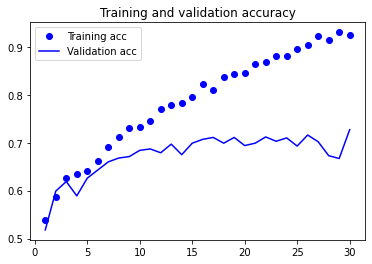

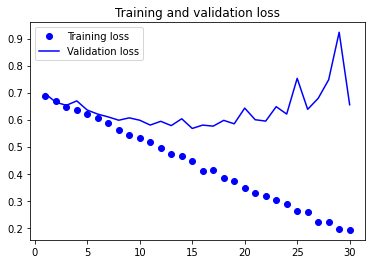

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [ ]:
1000/32

31.25

# Cat vs Dog Classification using Augmentation


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import models
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu',
input_shape=(150, 150, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
#model.add(layers.Dense(128, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.compile(loss='binary_crossentropy',
optimizer=optimizers.RMSprop(lr=1e-4),
metrics=['acc'])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
#train_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
                                rescale=1./255,
                                rotation_range=40,
                                width_shift_range=0.2,
                                height_shift_range=0.2,
                                shear_range=0.2,
                                zoom_range=0.2, 
                                horizontal_flip=True,)

validation_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)



In [ ]:
train_generator = train_datagen.flow_from_directory(
"/content/drive/MyDrive/cat and dog/train",
target_size=(150, 150),batch_size=32,class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
validation_generator = validation_datagen.flow_from_directory(
    '/content/drive/MyDrive/cat and dog/validation',
      target_size=(150,150),batch_size=32,class_mode="binary")

Found 1000 images belonging to 2 classes.


In [ ]:
history = model.fit_generator(
train_generator,
epochs=100,
validation_data=validation_generator,
validation_steps=32)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
63/63 [==============================] - 26s 388ms/step - loss: 0.6943 - acc: 0.4930 - val_loss: 0.6874 - val_acc: 0.5700
Epoch 2/100
63/63 [==============================] - 24s 377ms/step - loss: 0.6870 - acc: 0.5370 - val_loss: 0.6760 - val_acc: 0.5730
Epoch 3/100
63/63 [==============================] - 24s 384ms/step - loss: 0.6791 - acc: 0.5755 - val_loss: 0.6753 - val_acc: 0.5600
Epoch 4/100
63/63 [==============================] - 24s 384ms/step - loss: 0.6645 - acc: 0.5900 - val_loss: 0.6561 - val_acc: 0.6140
Epoch 5/100
63/63 [==============================] - 24s 384ms/step - loss: 0.6452 - acc: 0.6360 - val_loss: 0.6560 - val_acc: 0.6160
Epoch 6/100
63/63 [==============================] - 24s 383ms/step - loss: 0.6500 - acc: 0.6280 - val_loss: 0.6425 - val_acc: 0.6360
Epoch 7/100
63/63 [==============================] - 24s 383ms/step - loss: 0.6368 - acc: 0.6290 - val_loss: 0.6377 - val_acc: 0.6310
Epoch 8/100
63/63 [==============================] - 24s 383ms

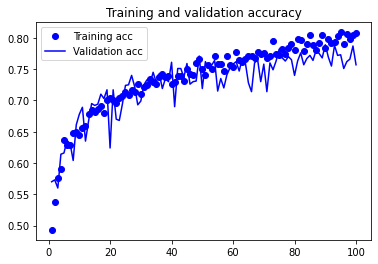

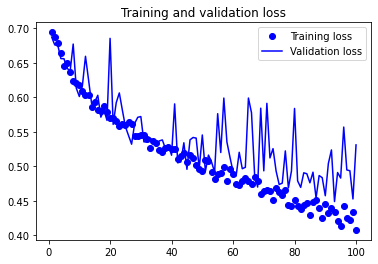

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()